# Load Libraries

In [2]:
# Install RPostgres if needed:
#install.packages("RPostgres")
#install.packages("tidyverse")

Installing package into ‘/home/elleven/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/elleven/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tinytex’, ‘rmarkdown’, ‘reprex’




In [1]:
library(DBI)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Connect to DB, load data, clean data

In [2]:
con <- dbConnect(
    RPostgres::Postgres(),
    dbname = 'npm_data', 
    user = 'federico',
    host = '127.0.0.1'
)

In [6]:
disjunction_count <- dbGetQuery(con, "select count(*) from analysis.dep_range_constraint_types where find_constraint = '||'") # '||'
conjunction_count <- dbGetQuery(con, "select count(*) from analysis.dep_range_constraint_types where find_constraint = ','") # ','
interval_count <- dbGetQuery(con, "select count(*) from analysis.dep_range_constraint_types where find_constraint = '-'") # '-'
patch_count <- dbGetQuery(con, "select count(*) from analysis.dep_range_constraint_types where find_constraint = 'patch'") # 'patch', like `~`
minor_count <- dbGetQuery(con, "select count(*) from analysis.dep_range_constraint_types where find_constraint = 'minor'") # 'minor', like '^'
major_count <- dbGetQuery(con, "select count(*) from analysis.dep_range_constraint_types where find_constraint = 'major'") # 'major', like '*'
lt_count <- dbGetQuery(con, "select count(*) from analysis.dep_range_constraint_types where find_constraint = '<'") # '<'
lte_count <- dbGetQuery(con, "select count(*) from analysis.dep_range_constraint_types where find_constraint = '<='") # '<='
gt_count <- dbGetQuery(con, "select count(*) from analysis.dep_range_constraint_types where find_constraint = '>'") # '>'
gte_count <- dbGetQuery(con, "select count(*) from analysis.dep_range_constraint_types where find_constraint = '>='") # '>='
eq_count <- dbGetQuery(con, "select count(*) from analysis.dep_range_constraint_types where find_constraint = '='") # '='
disjunction_count <- disjunction_count$count
conjunction_count <- conjunction_count$count
interval_count <- interval_count$count
patch_count <- patch_count$count
minor_count <- minor_count$count
major_count <- major_count$count
lt_count <- lt_count$count
lte_count <- lte_count$count
gt_count <- gt_count$count
gte_count <- gte_count$count
eq_count <- eq_count$count
total_count <- disjunction_count + conjunction_count + interval_count + patch_count + minor_count + major_count + lt_count + lte_count + gt_count + gte_count + eq_count

In [7]:
print(paste("disjunction_count", disjunction_count))
print(paste("conjunction_count", conjunction_count))
print(paste("interval_count", interval_count))
print(paste("patch_count", patch_count))
print(paste("minor_count", minor_count))
print(paste("major_count", major_count))
print(paste("lt_count", lt_count))
print(paste("lte_count", lte_count))
print(paste("gt_count", gt_count))
print(paste("gte_count", gte_count))
print(paste("eq_count", eq_count))
print(paste("total_count", total_count))

[1] "disjunction_count 19778"
[1] "conjunction_count 158"
[1] "interval_count 2069"
[1] "patch_count 245274"
[1] "minor_count 4245713"
[1] "major_count 37116"
[1] "lt_count 1211"
[1] "lte_count 714"
[1] "gt_count 4282"
[1] "gte_count 98678"
[1] "eq_count 4162046"
[1] "total_count 8817039"


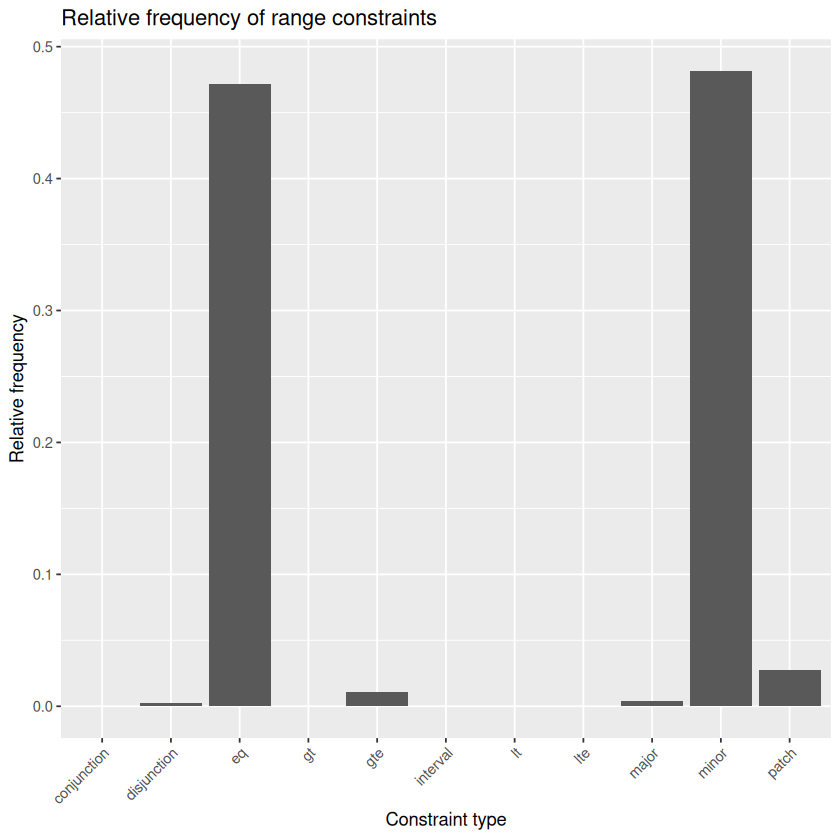

In [8]:
histo <- data.frame(
    constraint_type = c("disjunction", "conjunction", "interval", "patch", "minor", "major", "lt", "lte", "gt", "gte", "eq"),
    count = c(disjunction_count, conjunction_count, interval_count, patch_count, minor_count, major_count, lt_count, lte_count, gt_count, gte_count, eq_count)
)
histo <- histo %>% mutate(relative_frequency = count / total_count)

# plot it
ggplot(histo, aes(x = constraint_type, y = relative_frequency)) + geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + labs(title = "Relative frequency of range constraints", x = "Constraint type", y = "Relative frequency")